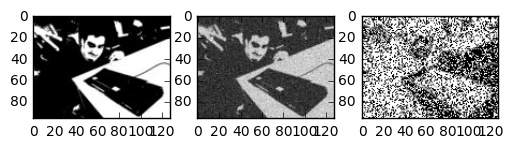

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import signal
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] = im2[index] + e[index]
    return im2
def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2
# proportion of pixels to alter
prop = 0.7
varSigma = 0.1
im = imread("../images/manan_grey_resize.jpg")
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im2 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im2,cmap='gray')

(96, 128)
1.0
-1.0
1.0
13378.0
(-0.18479999999999999, -0.18479999999999999)
(0.83127052133209001, 0.83127052133209001)
[[-1. -1.  1. ..., -1.  1. -1.]
 [ 1.  1.  1. ...,  1.  1. -1.]
 [ 1. -1. -1. ..., -1.  1. -1.]
 ..., 
 [ 1.  1. -1. ...,  1.  1. -1.]
 [ 1.  1.  1. ..., -1. -1. -1.]
 [-1. -1.  1. ..., -1.  1. -1.]]
initialised X i.e. latent image
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
YO WE OUT HERE 9
1.0
-1.0
1.0


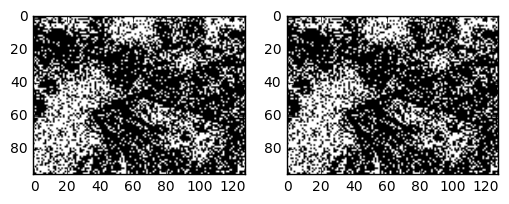

In [6]:
def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        print('Not yet implemented\n')
        #expand this to include diagonal elements
        return -1
    
print(im2.shape)
print(im2.item((34, 123)))
print(im2.item((36, 123)))
print(im2.item((33, 45)))

def likeli(image, imPoint, guess):
    if(image(imPoint) == 1 and guess == 1 or image(imPoint) == 0 and guess == -1):
        return 0.9
    return 0.1

def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]
    
def E_noOuterSum(image, point):
    expoSum = 0
    M, N = heightWidth(image)
    i, j = point[0], point[1]
    neighbourList = neighbours(i, j, M, N, size=4)
    for neighbour in neighbourList:
        expoSum += (image.item(neighbour) * image.item(point))
    val = np.exp(expoSum)
    return val

def E0(image):
    expoSum = 0
    M, N = heightWidth(image)
    for i in range(M):
        for j in range(N):
            neighbourList = neighbours(i, j, M, N, size=4)
            for neighbour in neighbourList:
                expoSum += (image.item(neighbour) * image.item((i, j)))
    return expoSum

print(E0(im2))
    
def prob(image, point, guess):
    #p(x, y) = 1/Z_1 * Prod_{i=1}^{N} (exp{L_i(x_i)} * 1/Z_0 * exp{Sum_{j in Neighbours(i)} (w_ij * x_i * x_j)})
    #separate the above into terms
    #ignoring likelihood part for now???
    p = 0
    Z0 = 1
    Z1 = 1
    H, W = heightWidth(image)
    for i in range(H):
        for j in range(W):
            p = p * (likeli(image, point, guess) * 1/Z0 * E_noOuterSum(image, point))
    p = p * 1/Z1
    return p
    
def bookEnergy(image, xImage, point):
    #last term
    height, width = heightWidth(image)
    
    kernel = np.array([[0,1,0],
                       [1,0,1],
                       [0,1,0]])
    
    np.put(xImage, point, 1)
    XY_multiplied_pos = np.multiply(image, xImage)
    finalSumPos = np.sum(XY_multiplied_pos)
    XN_multiplied_pos = signal.convolve2d(xImage, kernel, mode='same')
    middleSumPos = np.sum(XN_multiplied_pos)
    
    np.put(xImage, point, -1)
    XY_multiplied_neg = np.multiply(image, xImage)    
    finalSumNeg = np.sum(XY_multiplied_neg)
    XN_multiplied_neg = signal.convolve2d(xImage, kernel, mode='same')
    middleSumNeg = np.sum(XN_multiplied_pos)
    
#     finalSumPos = 0
#     finalSumNeg = 0
#     for m in range(height):
#         for n in range(width):
#             if ((m, n) == point):
#                 finalSumPos += image.item((m, n)) * 1
#                 finalSumNeg += image.item((m, n)) * -1
#             else:
#                 finalSumPos += image.item((m, n)) * xImage.item((m, n))
#                 finalSumNeg += image.item((m, n)) * xImage.item((m, n))
   
    
    

#     middleSumPos = 0
#     middleSumNeg = 0
#     for m in range(height):
#         for n in range(width):
#             neighbourList = neighbours(m, n, height, width, size=4)
#             for neighbour in neighbourList:
#                 if ((m, n) == point):
#                     middleSumPos += 1 * xImage.item(neighbour)
#                     middleSumNeg += -1 * xImage.item(neighbour)
#                 else:
#                     middleSumPos += xImage.item((m, n)) * xImage.item(neighbour)
#                     middleSumNeg += xImage.item((m, n)) * xImage.item(neighbour)
    totalSumPos = finalSumPos + middleSumPos
    totalSumNeg = finalSumNeg + middleSumNeg
    return totalSumPos/10000, totalSumNeg/10000
    
def jointProb(image, xImage, point):
    Z = 1
    posEnergy, negEnergy = bookEnergy(image, xImage, point)
    posVal = 1/Z * np.exp(posEnergy)
    negVal = 1/Z * np.exp(negEnergy)
    return posVal, negVal

print(bookEnergy(im2, im2, (34, 123)))
print(jointProb(im2, im2, (34, 123)))
    
def ICM(image):
    #set all the x variables to be = y variables
    #i.e. all the latent variables initialised as the image output
    H, W = heightWidth(image)
    X = image
    X[X != 1] = -1
    print(X)
    print("initialised X i.e. latent image")
    #loop up to a fixed number of times
    #loop through the image and consider the probabilities
    #if the probability of the point being 1 is greater than the probability of the point being -1
    #update the value of the point to be so
    #otherwise, do the opposite
    #flag for if we make a change
    #if through one loop we make no changes
    #break out of the iteration loop
    for iterations in range(10):
        flag = False
        for i in range(H):
            for j in range(W):
                #need to amend prob func to compare prob = 1 and prob = -1
#                 if(prob(image, (i, j), 1) > prob(image, (i, j), -1)):
#                     return None
                probPos, probNeg = jointProb(image, X, (i, j))
                if(probPos > probNeg):
                    if(X.item((i, j)) == -1):
                        flag = True
                        np.put(X, (i, j), 1)
                else:
                    if(X.item((i, j)) == 1):
                        flag = True
                        np.put(X, (i, j), -1)
        if(flag == False):
            break
        print("one iteration of ICM done")
    print("YO WE OUT HERE", iterations)
    
    for i in range(H):
        for j in range(W):
            if(X.item((i, j)) == 0):
#                 print("this pixel has value 0, why?!")
                k = 0
            elif(X.item((i, j)) == 1):
                np.put(X, (i, j), 1)
            elif (X.item((i, j)) == -1):
                np.put(X, (i, j), 0)
    
    return X

imFIXED = ICM(im2)

print(imFIXED.item((34, 123)))
print(imFIXED.item((36, 123)))
print(imFIXED.item((33, 45)))

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(imFIXED,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(im2,cmap='gray')
plt.show()